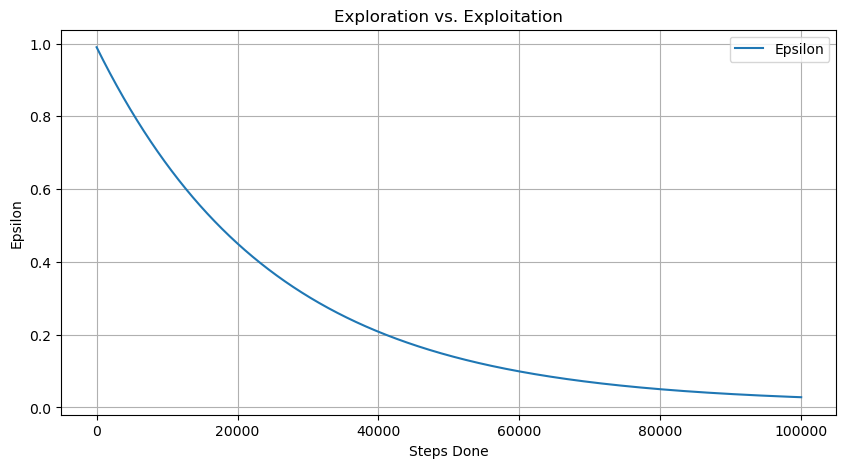

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Define parameters
EPS_START = 0.99  # Initial exploration rate
EPS_END = 0.01 # Final exploration rate
DECAY_RATE = 25000  # Decay rate

# Define the function to calculate epsilon
def epsilon(steps_done, EPS_START, EPS_END, DECAY_RATE):
    return EPS_END + (EPS_START - EPS_END) * math.exp(-1. * steps_done / DECAY_RATE)

# Generate data for steps_done
steps = np.arange(0, 1_00_000)  # For example, 0 to 1000 steps
epsilons = [epsilon(step, EPS_START, EPS_END, DECAY_RATE) for step in steps]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(steps, epsilons, label='Epsilon')
plt.title('Exploration vs. Exploitation')
plt.xlabel('Steps Done')
plt.ylabel('Epsilon')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
        .add_scalar("Loss/train", loss, epoch)


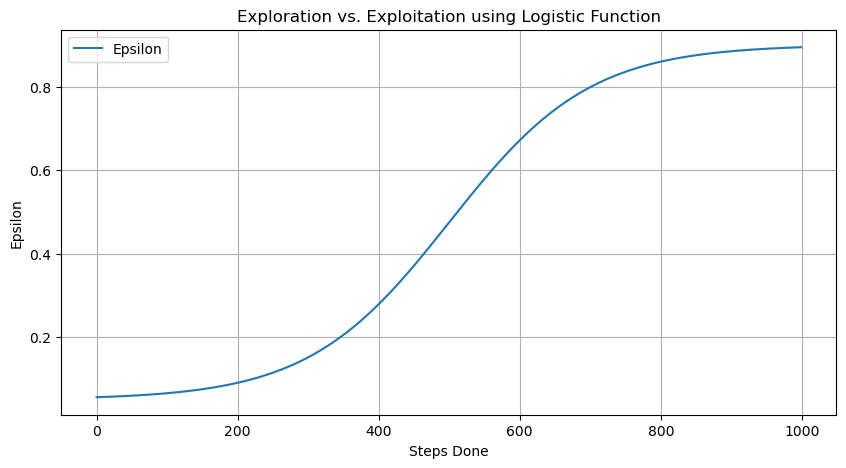

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
EPS_START = 0.9  # Initial exploration rate
EPS_END = 0.05   # Final exploration rate
MID_POINT = 500  # Step at which the inflection point occurs
STEEPNESS = 0.01  # Controls how steep the curve is

# Define the logistic function for epsilon
def epsilon(steps_done, EPS_START, EPS_END, MID_POINT, STEEPNESS):
    return EPS_END + (EPS_START - EPS_END) / (1 + np.exp(-STEEPNESS * (steps_done - MID_POINT)))

# Generate data for steps_done
steps = np.arange(0, 1000)  # For example, from 0 to 1000 steps
epsilons = [epsilon(step, EPS_START, EPS_END, MID_POINT, STEEPNESS) for step in steps]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(steps, epsilons, label='Epsilon')
plt.title('Exploration vs. Exploitation using Logistic Function')
plt.xlabel('Steps Done')
plt.ylabel('Epsilon')
plt.grid(True)
plt.legend()
plt.show()


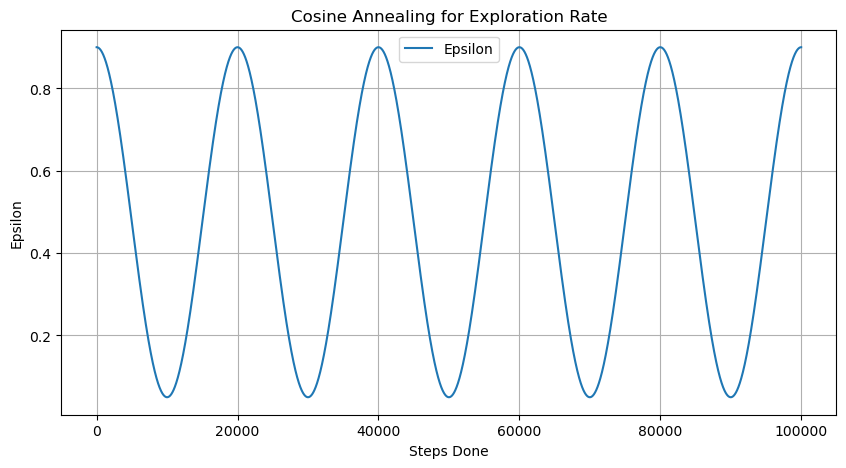

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
EPS_START = 0.9  # Initial exploration rate
EPS_END = 0.05   # Final exploration rate
T_MAX = 10000     # The period of each annealing cycle

# Define the cosine annealing function for epsilon
def cosine_annealing(steps_done, EPS_START, EPS_END, T_MAX):
    return EPS_END + (EPS_START - EPS_END) / 2 * (1 + np.cos(steps_done / T_MAX * np.pi))

# Generate data for steps_done
steps = np.arange(0, 100_000)  # For example, from 0 to 2000 steps to show two cycles
epsilons = [cosine_annealing(step, EPS_START, EPS_END, T_MAX) for step in steps]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(steps, epsilons, label='Epsilon')
plt.title('Cosine Annealing for Exploration Rate')
plt.xlabel('Steps Done')
plt.ylabel('Epsilon')
plt.grid(True)
plt.legend()
plt.show()


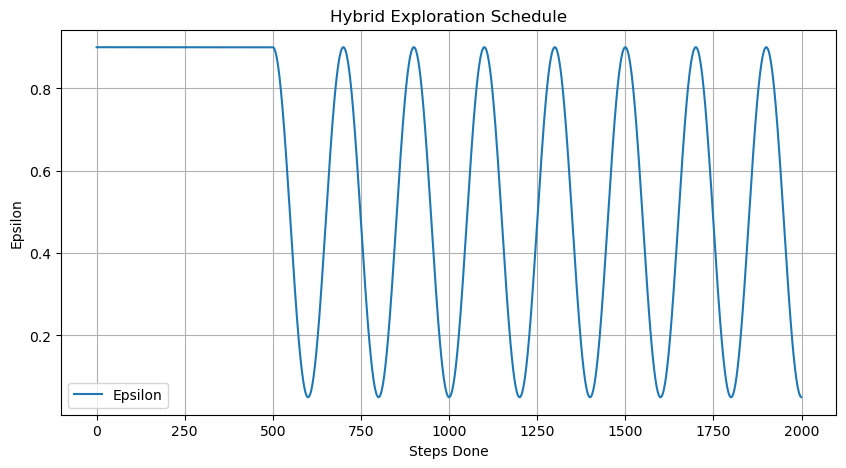

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Define parameters
EPS_START = 0.9      # Initial exploration rate
EPS_INTER = 0.9    # Exploration rate at the transition point
EPS_END = 0.05       # Final exploration rate
DECAY_STEPS = 500    # Number of steps in the initial slow decay phase
T_MAX = 100         # Period of each cosine annealing cycle
TOTAL_STEPS = 2000   # Total steps to plot

# Define the hybrid exploration rate function
def hybrid_exploration(steps_done, EPS_START, EPS_INTER, EPS_END, DECAY_STEPS, T_MAX):
    if steps_done < DECAY_STEPS:
        # Slow linear decay phase
        return EPS_START - (EPS_START - EPS_INTER) * (steps_done / DECAY_STEPS)
    else:
        # Cosine annealing phase
        return EPS_END + 0.5 * (EPS_INTER - EPS_END) * \
               (1 + np.cos(np.pi * (steps_done - DECAY_STEPS) / T_MAX))

# Generate data for steps_done
steps = np.arange(0, TOTAL_STEPS)
epsilons = [hybrid_exploration(step, EPS_START, EPS_INTER, EPS_END, DECAY_STEPS, T_MAX) for step in steps]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(steps, epsilons, label='Epsilon')
plt.title('Hybrid Exploration Schedule')
plt.xlabel('Steps Done')
plt.ylabel('Epsilon')
plt.grid(True)
plt.legend()
plt.show()


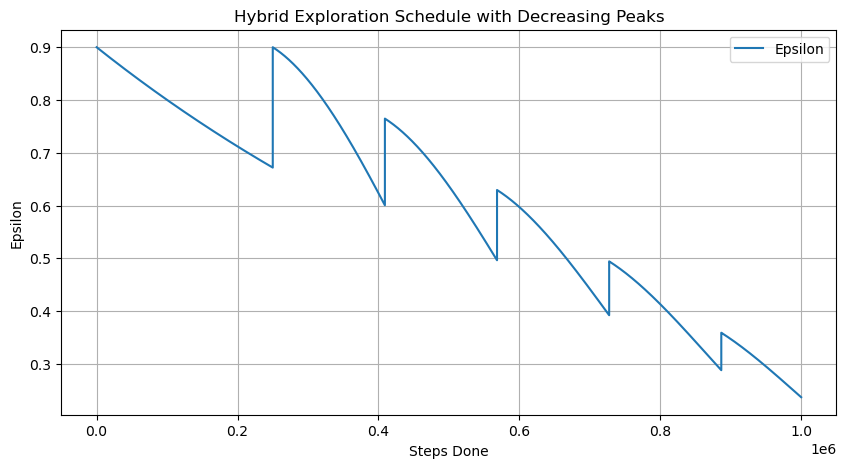

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
EPS_START = 0.9       # Initial exploration rate
EPS_INTER = 0.9      # Exploration rate at the transition point
EPS_END = 0.05        # Minimum final exploration rate
DECAY_STEPS = 250000     # Number of steps in the initial slow decay phase
T_MAX = 500000       # Period of each cosine annealing cycle
TOTAL_STEPS = 1000000    # Total steps to plot
PEAK_DECAY_RATE = 0.05 # Rate at which the peaks decrease

# Define the hybrid exploration rate function
def hybrid_exploration(steps_done, EPS_START, EPS_INTER, EPS_END, DECAY_STEPS, T_MAX, PEAK_DECAY_RATE):
    if steps_done < DECAY_STEPS:
        # exponential decay phase
        return EPS_END + (EPS_START - EPS_END) * math.exp(-1. * steps_done / DECAY_RATE)
    else:
        # Adjusted amplitude for cosine annealing that decreases over steps
        adjusted_max = EPS_INTER - (EPS_INTER - EPS_END) * ((steps_done - DECAY_STEPS) / TOTAL_STEPS)
        current_amplitude = max(adjusted_max - EPS_END, 0)
        
        # Cosine annealing phase with decreasing peaks
        return EPS_END + 0.5 * current_amplitude * (1 + np.cos(np.pi * (steps_done - DECAY_STEPS) % T_MAX / T_MAX))

# Generate data for steps_done
steps = np.arange(0, TOTAL_STEPS)
epsilons = [hybrid_exploration(step, EPS_START, EPS_INTER, EPS_END, DECAY_STEPS, T_MAX, PEAK_DECAY_RATE) for step in steps]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(steps, epsilons, label='Epsilon')
plt.title('Hybrid Exploration Schedule with Decreasing Peaks')
plt.xlabel('Steps Done')
plt.ylabel('Epsilon')
plt.grid(True)
plt.legend()
plt.show()


In [61]:
import torch
torch.rand(2, 210, 100, 3).data

tensor([[[[0.0684, 0.6394, 0.0782],
          [0.3422, 0.9604, 0.2364],
          [0.7061, 0.2306, 0.5817],
          ...,
          [0.2698, 0.3177, 0.2976],
          [0.1277, 0.9648, 0.9331],
          [0.1209, 0.7816, 0.0608]],

         [[0.5237, 0.8759, 0.3765],
          [0.0489, 0.0945, 0.4916],
          [0.0904, 0.2775, 0.5400],
          ...,
          [0.2578, 0.7373, 0.4171],
          [0.4061, 0.9589, 0.1421],
          [0.7227, 0.5193, 0.2077]],

         [[0.3489, 0.9078, 0.1964],
          [0.4604, 0.4405, 0.4552],
          [0.5106, 0.9005, 0.3563],
          ...,
          [0.4146, 0.8611, 0.7149],
          [0.3247, 0.0024, 0.0912],
          [0.2679, 0.3772, 0.7473]],

         ...,

         [[0.3282, 0.2557, 0.5325],
          [0.0519, 0.7440, 0.8257],
          [0.9345, 0.6720, 0.1990],
          ...,
          [0.7091, 0.8022, 0.4134],
          [0.0614, 0.6465, 0.7305],
          [0.9681, 0.9388, 0.6039]],

         [[0.0871, 0.3783, 0.8278],
          [0.4099

In [11]:
torch.rand(1, 10, 5, 3)

tensor([[[[0.5796, 0.3431, 0.2165],
          [0.1900, 0.2367, 0.7330],
          [0.3924, 0.2505, 0.7199],
          [0.8932, 0.2053, 0.2289],
          [0.9115, 0.8144, 0.3027]],

         [[0.4708, 0.5806, 0.3858],
          [0.4976, 0.7077, 0.6288],
          [0.0982, 0.4352, 0.6193],
          [0.2383, 0.0628, 0.8081],
          [0.5525, 0.4488, 0.1259]],

         [[0.0756, 0.7385, 0.5656],
          [0.9289, 0.6292, 0.0596],
          [0.6279, 0.4776, 0.0484],
          [0.0692, 0.3751, 0.6307],
          [0.3690, 0.7072, 0.1363]],

         [[0.4320, 0.3951, 0.9675],
          [0.9337, 0.5636, 0.1033],
          [0.8381, 0.6790, 0.0886],
          [0.9319, 0.1007, 0.6529],
          [0.9211, 0.0716, 0.3541]],

         [[0.1300, 0.1497, 0.9137],
          [0.0189, 0.1798, 0.5677],
          [0.2407, 0.7478, 0.9525],
          [0.6672, 0.7050, 0.8814],
          [0.7014, 0.9928, 0.1946]],

         [[0.0456, 0.9248, 0.6830],
          [0.0013, 0.0684, 0.6232],
          [0.0776,

In [2]:
# class Mario:
#     def __init__(self, state_dim, action_dim, save_dir):
#         self.state_dim = state_dim
#         self.action_dim = action_dim
#         self.save_dir = save_dir

#         self.device = "cuda" if torch.cuda.is_available() else "cpu"

#         # Mario's DNN to predict the most optimal action - we implement this in the Learn section
#         self.net = MarioNet(self.state_dim, self.action_dim).float()
#         self.net = self.net.to(device=self.device)

#         self.exploration_rate = 1
#         self.exploration_rate_decay = 0.99999975
#         self.exploration_rate_min = 0.1
#         self.curr_step = 0

#         self.save_every = 5e5  # no. of experiences between saving Mario Net

#     def act(self, state):
#         """
#     Given a state, choose an epsilon-greedy action and update value of step.

#     Inputs:
#     state(``LazyFrame``): A single observation of the current state, dimension is (state_dim)
#     Outputs:
#     ``action_idx`` (``int``): An integer representing which action Mario will perform
#     """
#         # EXPLORE
#         if np.random.rand() < self.exploration_rate:
#             action_idx = np.random.randint(self.action_dim)

#         # EXPLOIT
#         else:
#             state = state[0].__array__() if isinstance(state, tuple) else state.__array__()
#             state = torch.tensor(state, device=self.device).unsqueeze(0)
#             action_values = self.net(state, model="online")
#             action_idx = torch.argmax(action_values, axis=1).item()

#         # decrease exploration_rate
#         self.exploration_rate *= self.exploration_rate_decay
#         self.exploration_rate = max(self.exploration_rate_min, self.exploration_rate)

#         # increment step
#         self.curr_step += 1
#         return action_idx

# plot the exploration rate
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
EPS_START = 0.9  # Initial exploration rate
EPS_END = 0.05   # Final exploration rate
DECAY_RATE = 80000  # Decay rate

# Define the function to calculate epsilon
def epsilon(steps_done, EPS_START, EPS_END, DECAY_RATE):
    return EPS_END + (EPS_START - EPS_END) * math.exp(-1. * steps_done / DECAY_RATE)
